# Import Libraries

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Create Label

In [4]:
label_df = pd.read_csv('labels.csv')
label_df.head(10)

,filename,format
0,COVID-1,PNG
1,COVID-2,PNG
2,COVID-3,PNG
3,COVID-4,PNG
4,COVID-5,PNG
5,COVID-6,PNG
6,COVID-7,PNG
7,COVID-8,PNG
8,COVID-9,PNG
9,COVID-10,PNG


In [13]:
def create_label_series(df):
    label_dict = {
        'COVID':0,
        'Lung_Opacity':1,
        'NORMAL':2,
        'Viral Pneumonia':3
    }
    labels_series = df['filename'].apply(lambda x: label_dict[x.split('-')[0]])
    return labels_series

In [14]:
labels_series = create_label_series(label_df)

In [15]:
labels_series

0        0
1        0
2        0
3        0
4        0
        ..
21160    3
21161    3
21162    3
21163    3
21164    3
Name: filename, Length: 21165, dtype: int64

In [17]:
final_label = label_df.copy()
final_label['labels'] = labels_series

In [18]:
final_label.head(10)

,filename,format,labels
0,COVID-1,PNG,0
1,COVID-2,PNG,0
2,COVID-3,PNG,0
3,COVID-4,PNG,0
4,COVID-5,PNG,0
5,COVID-6,PNG,0
6,COVID-7,PNG,0
7,COVID-8,PNG,0
8,COVID-9,PNG,0
9,COVID-10,PNG,0


# Check Data Distribution

In [29]:
label_dict = {
        0:'COVID',
        1:'Lung_Opacity',
        2:'NORMAL',
        3:'Viral Pneumonia'
    }
eda_df = pd.DataFrame({
'filename':final_label.filename.values,
'labels':final_label.labels.values})
eda_df.labels = eda_df['labels'].apply(lambda x: label_dict[x])
eda_df.head(10)

,filename,labels
0,COVID-1,COVID
1,COVID-2,COVID
2,COVID-3,COVID
3,COVID-4,COVID
4,COVID-5,COVID
5,COVID-6,COVID
6,COVID-7,COVID
7,COVID-8,COVID
8,COVID-9,COVID
9,COVID-10,COVID


In [32]:
eda_df.groupby('labels').count()

,filename
labels,
COVID,3616
Lung_Opacity,6012
NORMAL,10192
Viral Pneumonia,1345


Text(0, 0.5, 'Count')

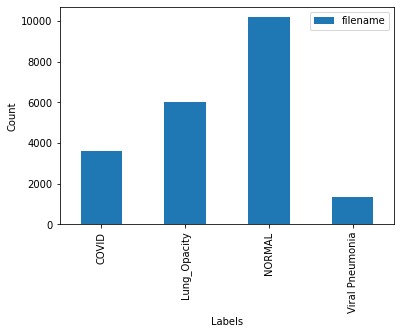

In [31]:

eda_df.groupby('labels').count().plot.bar()
plt.xlabel('Labels')
plt.ylabel('Count')